**Health app analysis**

Here we are provided real time usage data of a user who used this health app for ten days. Our job is to analyse the usage pattern and derive insights from the data.


In [ ]:
#getting the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

In [ ]:
#loading the data
logs_df = pd.read_csv('/content/sample_data/HealthApp_2k.log_structured.csv')
logs_df.head()


,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [ ]:
#examining the dataset
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [ ]:
#formatting the time
logs_df['Time'] = pd.to_datetime(logs_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
logs_df['Time']

0      2017-12-23 22:15:29.606
1      2017-12-23 22:15:29.615
2      2017-12-23 22:15:29.633
3      2017-12-23 22:15:29.635
4      2017-12-23 22:15:29.635
                 ...          
1995   2017-12-24 00:58:53.985
1996   2017-12-24 00:59:07.581
1997   2017-12-24 01:00:00.794
1998   2017-12-24 01:01:00.935
1999   2017-12-24 01:02:35.789
Name: Time, Length: 2000, dtype: datetime64[ns]

In [ ]:
#seeing various components counts
logs_df['Component'].value_counts()

Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: Component, dtype: int64

In [ ]:
#seeing various content counts
logs_df['Content'].value_counts()


calculateAltitudeWithCache totalAltitude=240                                                             217
processHandleBroadcastAction action:android.intent.action.TIME_TICK                                      144
onStandStepChanged 3786                                                                                   73
onStandStepChanged 3761                                                                                   59
calculateCaloriesWithCache totalCalories=130673                                                           48
                                                                                                        ... 
onExtend:1514038677000 1 0 4                                                                               1
 getTodayTotalDetailSteps = 1514038560000##7105##548582##8661##16256##27319968                             1
setTodayTotalDetailSteps=1514038560000##7106##548583##8661##16256##27320969                                1
calculateCaloriesWi

In [ ]:
#counting the daily steps
daily_steps = logs_df[logs_df['Component'] == 'Step_ExtSDM'].groupby(logs_df['Time'].dt.date)['Content'].count()


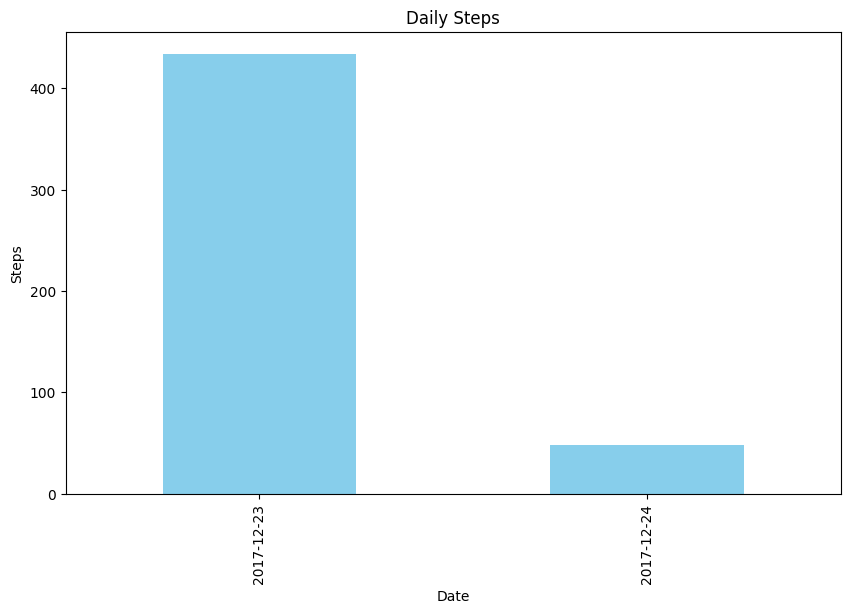

In [ ]:
# Daily Steps Plot
plt.figure(figsize=(10, 6))
daily_steps.plot(kind='bar', color='skyblue')
plt.title('Daily Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()

In [ ]:
#seeing the active times
logs_df['Hour'] = logs_df['Time'].dt.hour
active_times = logs_df.groupby('Hour')['LineId'].count()
active_times

Hour
0      221
1        3
22    1243
23     533
Name: LineId, dtype: int64

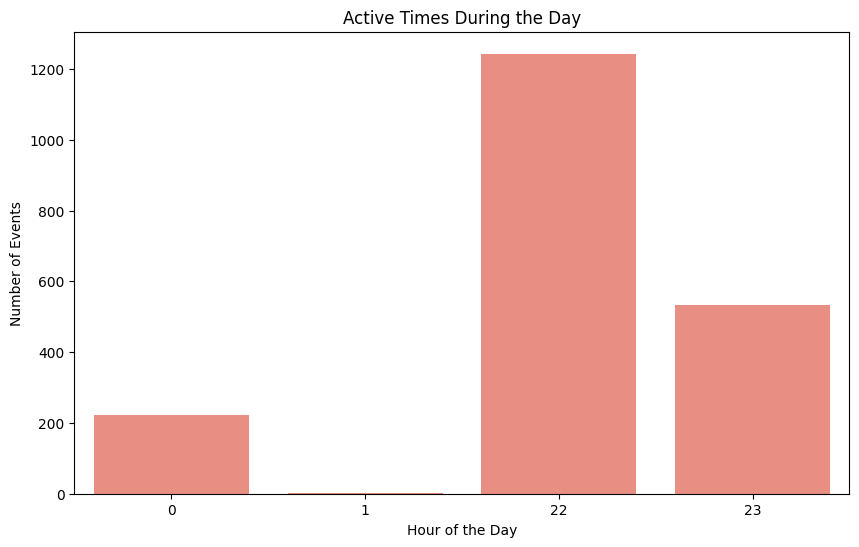

In [ ]:
# Active Times Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=active_times.index, y=active_times.values, color='salmon')
plt.title('Active Times During the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

In [ ]:
# Filtering rows related to workout activities
workout_df = logs_df[logs_df['Component'].isin(['Step_LSC', 'Step_ExtSDM'])]
workout_df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Hour
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,22
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,22
7,8,2017-12-23 22:15:29.636,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,22
8,9,2017-12-23 22:15:29.645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,22
...,...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,0
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,0
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,1
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,1


<ipython-input-26-d281c619dea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workout_df['Hour'] = workout_df['Time'].dt.hour


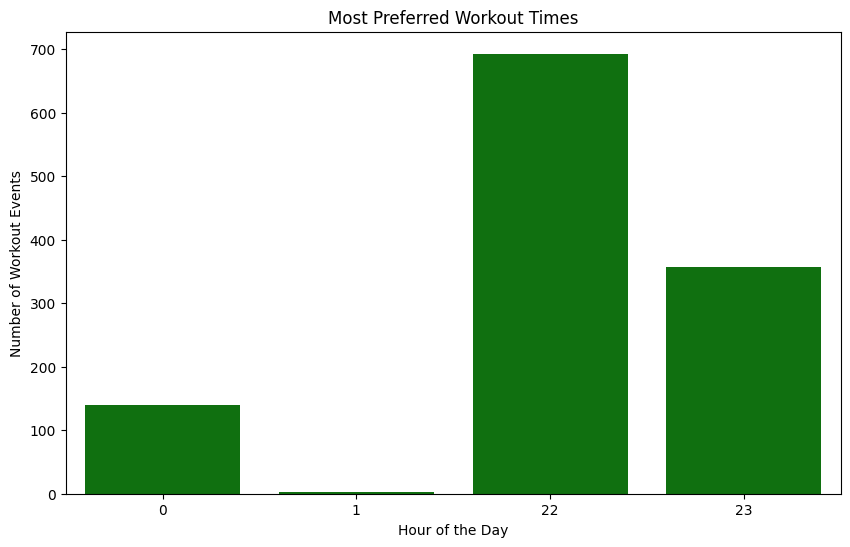

In [ ]:
# Extracting the hour from the 'Time' column
workout_df['Hour'] = workout_df['Time'].dt.hour

# Counting the occurrences of each hour
preferred_workout_times = workout_df['Hour'].value_counts()

# Visualizing the preferred workout times
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_workout_times.index, y=preferred_workout_times.values, color='green')
plt.title('Most Preferred Workout Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Workout Events')
plt.show()


In [ ]:
# Identifying the hour with the maximum occurrences
most_preferred_hour = preferred_workout_times.idxmax()
print(f"The most preferred workout time is at {most_preferred_hour}:00")

The most preferred workout time is at 22:00


In [ ]:
#  Calorie Calculation
calorie_df = logs_df[logs_df['Component'] == 'Step_ExtSDM']
calorie_df['Calories'] = calorie_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
calorie_df['Calories']

<ipython-input-28-f800275b7575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calorie_df['Calories'] = calorie_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)


8       126775.0
9            NaN
17      126797.0
18           NaN
24      126818.0
          ...   
1954         NaN
1959         0.0
1960         NaN
1968         0.0
1969         NaN
Name: Calories, Length: 482, dtype: float64

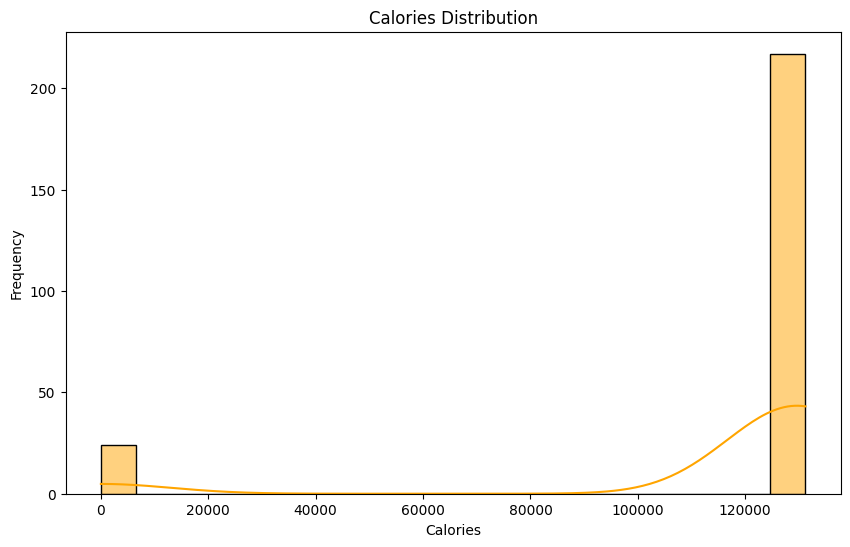

In [ ]:
# Visualize calorie calculation
plt.figure(figsize=(10, 6))
sns.histplot(calorie_df['Calories'], bins=20, kde=True, color='orange')
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#  Altitude Changes
altitude_df = logs_df[logs_df['Component'] == 'Step_ExtSDM']
altitude_df['Altitude'] = altitude_df['Content'].str.extract(r'totalAltitude=(\d+)').astype(float)
altitude_df['Altitude']

<ipython-input-30-7cd68927c175>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  altitude_df['Altitude'] = altitude_df['Content'].str.extract(r'totalAltitude=(\d+)').astype(float)


8         NaN
9       240.0
17        NaN
18      240.0
24        NaN
        ...  
1954      0.0
1959      NaN
1960      0.0
1968      NaN
1969      0.0
Name: Altitude, Length: 482, dtype: float64

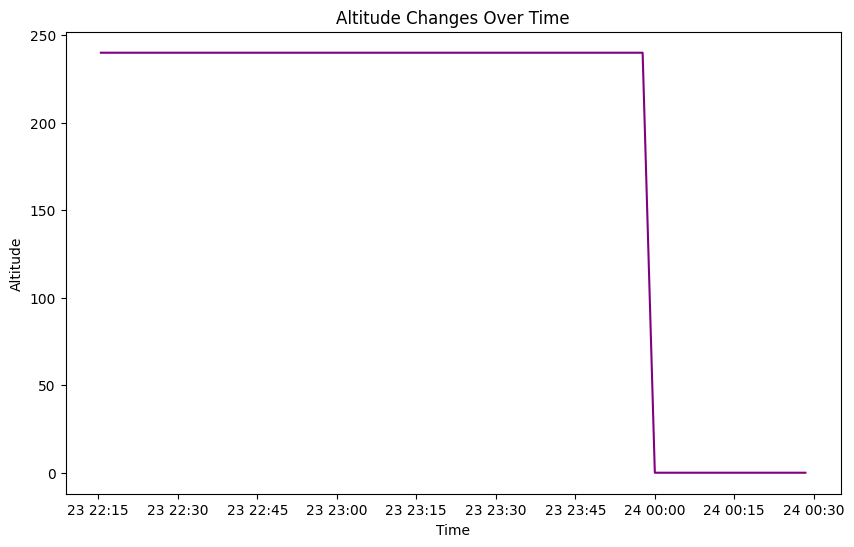

In [ ]:
# Visualizing altitude changes wrt time
plt.figure(figsize=(10, 6))
sns.lineplot(x=altitude_df['Time'], y=altitude_df['Altitude'], color='purple')
plt.title('Altitude Changes Over Time')
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.show()

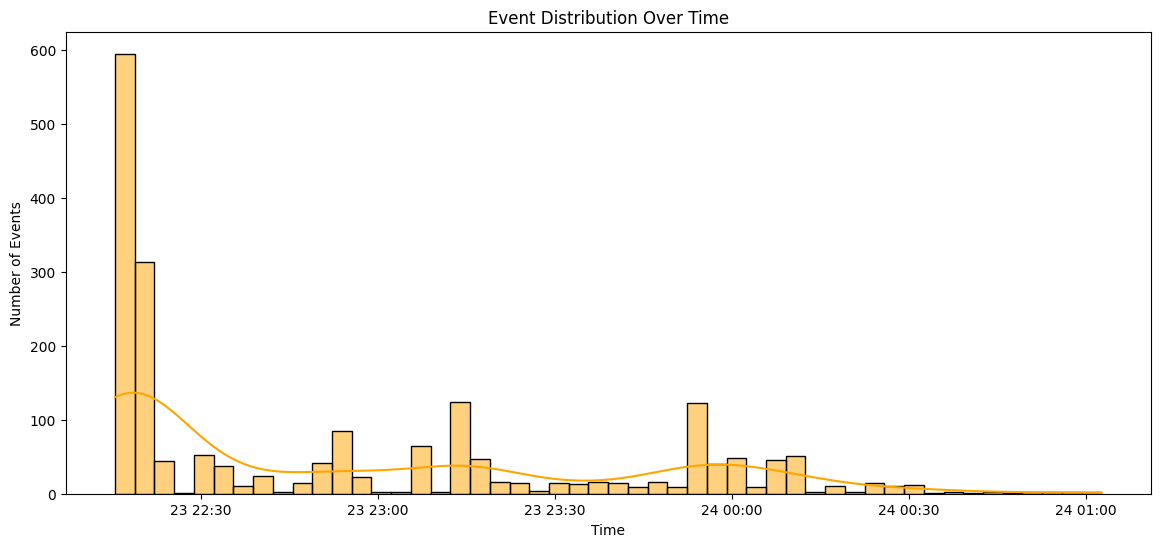

In [ ]:
#  Event Distribution Over Time
plt.figure(figsize=(14, 6))
sns.histplot(logs_df['Time'], bins=50, kde=True, color='orange')
plt.title('Event Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()
